In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Chapter 3 (part 1) ADC

## Digitization process
- <strong>Sampling</strong>: Converting the independent variable (e.g., time) from continuous to discrete.
- <strong>Quantization</strong>: Converting the dependent variable (e.g., signal intensity) from continuous to discrete.

<strong>Analog input</strong> (<span style="color:blue">continuous</span> signal, <span style="color:blue">continuous</span> time)   
&darr;  
<strong>S/H (sample-and-hold)</strong> (<span style="color:blue">continuous</span> signal, <span style="color:red">discrete</span> time)   
&darr;   
<strong>ADC (analot-to-digital conversion)</strong> (<span style="color:red">discrete</span> signal, <span style="color:red">discrete</span> time) 

### Analog signal (continuous signal, continuous time)

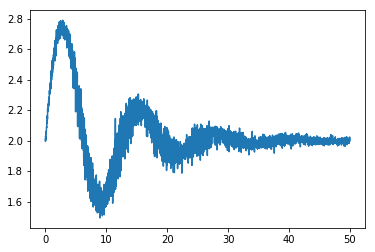

In [2]:
x_cont = np.linspace(0,50,5001)
y_cont = np.zeros_like(x_cont)

np.random.seed(0)

for i in range(x_cont.shape[0]):
    y_cont[i]= np.sin(x_cont[i]/2*np.random.normal(loc=1.0, scale=0.05))*np.exp(-x_cont[i]/10*np.random.normal(loc=1.0, scale=0.1))+np.random.normal(loc=0.0, scale=0.01)

y_cont += 2
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(x_cont,y_cont)

plt.show()

### Sampled analog signal (continuous signal, discrete time)

Let us prepare signal after S/H (sample-and-hold) process.

In [22]:
num_samples=51

sh = np.linspace(0,y_cont.shape[0]-1,num_samples).astype(np.int16)
sh

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000], dtype=int16)

In [23]:
y_sh=np.zeros_like(y_cont) 

for i in range(sh.shape[0]-1):
    y_sh[sh[i]:sh[i+1]] = y_cont[sh[i]]

Results are shown below.

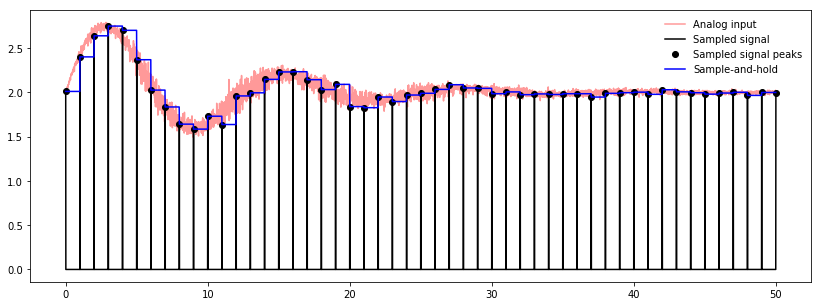

In [26]:
# Preparation of sampled data (impulse)
y_sample = np.zeros_like(y_cont) 
y_sample[sh] = y_cont[np.linspace(0,y_cont.shape[0]-1,num_samples).astype(np.int16)]

# Data visualization
fig= plt.figure(figsize=(14,5))
ax=fig.add_subplot(111)
ax.plot(x_cont,y_cont, color='red', alpha=0.4) # continuous analog input

ax.plot(x_cont,y_sample, color='black') # sampled signal


#Just for improving visualization (sampled signal peaks)
x_disc = np.linspace(0,50,num_samples).astype(np.int8) # x (discrete-time)
y_samp=y_cont[np.linspace(0,y_cont.shape[0]-1,num_samples).astype(np.int16)] 
ax.plot(x_disc,y_samp, color='black', marker='o', linewidth=0)


# sample and hold
ax.plot(x_cont[:-1],y_sh[:-1], color='blue')

ax.legend(['Analog input','Sampled signal','Sampled signal peaks', 'Sample-and-hold'], frameon=False) # label

plt.show()

### Digitized signal (discrete signal, discrete time)

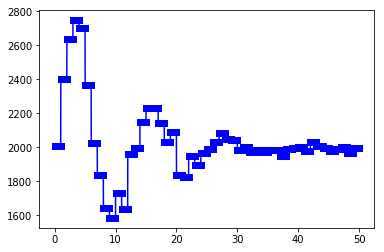

In [49]:
y_disc = np.round(y_sh*1000).astype(np.int16) # quantization

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(x_cont[:-1],y_disc[:-1], color='blue', marker='s')

plt.show()

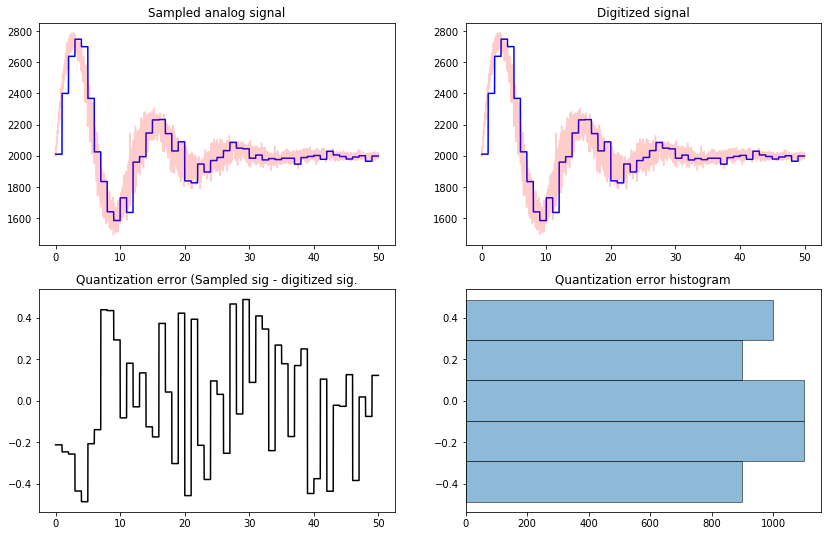

In [166]:
quant_error=y_sh[:-1]*1000-y_disc[:-1]  # quantization error

# Sampled signal
fig=plt.figure(figsize=(14,9))
ax=fig.add_subplot(221)
ax.plot(x_cont[:-1],y_sh[:-1]*1000, color='blue')
ax.set_title('Sampled analog signal')
ax.plot(x_cont,y_cont*1000, color='red', alpha=0.2) # analog input as a reference

# Digitized signal
ax=fig.add_subplot(222)
ax.plot(x_cont[:-1],y_disc[:-1], color='blue')
ax.set_title('Digitized signal')
ax.plot(x_cont,y_cont*1000, color='red', alpha=0.2) # analog input as a reference

# Quantization error
ax=fig.add_subplot(223)
ax.plot(x_cont[:-1], quant_error, color='black')
ax.set_title('Quantization error (Sampled sig - digitized sig.')

# Quantization error histogram
ax=fig.add_subplot(224)
ax.hist(quant_error, bins=5,ec='black',orientation='horizontal', alpha=0.5) 
ax.set_title('Quantization error histogram')


plt.show()

The digitized signal can have a maximum error of +/- 0.5 <strong>LSB (least significant bit)</strong>. This error obeys uniform distribution and has a mean of zero and a standard deviation of 1/sqrt(12) = 0.29 LSB. 

In [81]:
print("Average of the error (expected to be 0):", np.mean(quant_error))
print("Standard deviation (expected to be 1/sqrt(12) = 0.29 LSB):", np.std(quant_error))

Average of the error (expected to be 0): -0.007852922714632768
Standard deviation (expected to be 1/sqrt(12) = 0.29 LSB): 0.2837006169630124


## Dithering

The quantization error cannot be regarded as random when the analog signal remains at about the same value for long duration. For such an analog signal, the digitized siglan remains stuck on the same digital number for many samples.   

<strong>Dithering</strong> is a technique for improving the digitization of signals with small changes. By adding noise to an original analog signal, it is possible to make digitized signal toggle between adjacent quantization levels. As a result, more information about the original signal can be obtained.  

Let us consider collecting 10,000 samples of a constant analog voltage of 3.0001 V. Without dithering, you will get 10,000 identical numbers (= 3000). If you performe dithering, you will get 3000 for 90% and 3001 for 10%. As a result, you can get the correct average of 3000.1.  

In [163]:
v_center= 3.0001 # true value
num_samples = 100000 # number of samples

v_const_analog= np.ones(num_samples)*v_center
v_dithering = np.zeros_like(v_const_analog)

# Adding random noise (dithering)
np.random.seed(0)
for i in range(num_samples):
    v_dithering[i] = v_const_analog[i]*1000 + np.random.normal(loc=0, scale=2/3) #std = 2/3 LSB
    

# Quantization without dithering
temp=np.round(v_const_analog*1000).astype(np.int16)# quantization
print("---------------------")
print("True value: 3000.1")
print("---------------------")
print("Average of the quantized signal (w/o dithering)", np.mean(temp))
print("---------------------")

# Quantization with dithering
temp = np.round(v_dithering).astype(np.int16) # quantization
print("Average of the quantized signal (with dithering)", np.mean(temp))

---------------------
True value: 3000.1
---------------------
Average of the quantized signal (w/o dithering) 3000.0
---------------------
Average of the quantized signal (with dithering) 3000.10204
